In [1]:
import pandas as pd
from pymongo import MongoClient
import requests

#regex
import re

#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image


# MONGO DATA BASE

In [2]:
data = pd.read_csv('data/Game_of_Thrones_Script.csv')
data

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [3]:
data.to_json("data/Game_of_Thrones_Script_json", orient="records")

In [4]:
!mongoimport --db GOT --collection frases --jsonArray data/Game_of_Thrones_Script_json

2021-05-05T12:18:45.718+0200	connected to: mongodb://localhost/
2021-05-05T12:18:46.846+0200	23911 document(s) imported successfully. 0 document(s) failed to import.


# API

### Introducir datos a  Mongo

datos = {
 'Season': "Season 1",
 'Episode': "Episode 1",
 'Episode Title': 'Winter is Coming',
 'Name': 'Edu Martinez',
 'Sentence': 'A Martinez always pays his debts'        
    }

url = "http://localhost:5000/nuevafrase"

requests.post(url, data=datos)

### Bajar datos 

In [5]:
url_query = "http://localhost:5000/basedatos"
data = requests.get(url_query).json()
data[:3]

[{'Episode': 'Episode 1',
  'Episode Title': 'Winter is Coming',
  'Name': 'will',
  'Release Date': '2011-04-17',
  'Season': 'Season 1',
  'Sentence': 'Close as any man would.'},
 {'Episode': 'Episode 1',
  'Episode Title': 'Winter is Coming',
  'Name': 'gared',
  'Release Date': '2011-04-17',
  'Season': 'Season 1',
  'Sentence': 'We should head back to the wall.'},
 {'Episode': 'Episode 1',
  'Episode Title': 'Winter is Coming',
  'Name': 'waymar royce',
  'Release Date': '2011-04-17',
  'Season': 'Season 1',
  'Sentence': "What do you expect? They're savages. One lot steals a goat from another lot and before you know it, they're ripping each other to pieces."}]

In [6]:
api_data = pd.DataFrame(data)

In [7]:
api_data.dropna(inplace=True)
api_data

,Episode,Episode Title,Name,Release Date,Season,Sentence
0,Episode 1,Winter is Coming,will,2011-04-17,Season 1,Close as any man would.
1,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,We should head back to the wall.
2,Episode 1,Winter is Coming,waymar royce,2011-04-17,Season 1,What do you expect? They're savages. One lot s...
3,Episode 1,Winter is Coming,royce,2011-04-17,Season 1,Do the dead frighten you?
4,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,Our orders were to track the wildlings. We tra...
...,...,...,...,...,...,...
119551,Episode 6,The Iron Throne,brienne,2019-05-19,Season 8,I think we can all agree that ships take prece...
119552,Episode 6,The Iron Throne,tyrion lannister,2019-05-19,Season 8,I once brought a jackass and a honeycomb into ...
119553,Episode 6,The Iron Throne,man,2019-05-19,Season 8,The Queen in the North!
119554,Episode 6,The Iron Throne,all,2019-05-19,Season 8,The Queen in the North! The Queen in the North...


# SENTIMENT ANALYSIS

### TOKENIZE

In [8]:
from sentiment_analysis_spanish import sentiment_analysis

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/edu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df = api_data

In [11]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [12]:
df['tokenize'] = df['Sentence'].apply(tokenize)
df.head()

,Episode,Episode Title,Name,Release Date,Season,Sentence,tokenize
0,Episode 1,Winter is Coming,will,2011-04-17,Season 1,Close as any man would.,"[Close, as, any, man, would]"
1,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,We should head back to the wall.,"[We, should, head, back, to, the, wall]"
2,Episode 1,Winter is Coming,waymar royce,2011-04-17,Season 1,What do you expect? They're savages. One lot s...,"[What, do, you, expect, They, re, savages, One..."
3,Episode 1,Winter is Coming,royce,2011-04-17,Season 1,Do the dead frighten you?,"[Do, the, dead, frighten, you]"
4,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,Our orders were to track the wildlings. We tra...,"[Our, orders, were, to, track, the, wildlings,..."


## Stop words

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/edu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'off', 'so', 'out', 'had', 'herself', 'no', 'his', "you're", 'your', 'nor', 'them', 'with', "hasn't", 'been', 'of', 'they', "won't", 'what', 'have', 'do', 'shan', 'was', 'under', 'again', 'themselves', "aren't", 'wouldn', 'ours', 'haven', 've', 'why', 'then', 'a', 'him', 'itself', 'during', 'above', 's', 'over', "shan't", 'at', 'd', 'if', 'most', "don't", "couldn't", 'some', 'doesn', 'which', "that'll", 'other', 'shouldn', 'our', 'himself', 'weren', 'few', 'in', 'too', 'does', 'once', 'any', "hadn't", 'the', "needn't", 'can', "wouldn't", 'i', 'ma', "haven't", 'is', 'their', 'y', 'should', 'theirs', 'hadn', 'from', 'after', 'won', "should've", 'are', 'ourselves', "you'll", 'than', 'don', 'all', 'as', 'only', 'o', 'isn', "mustn't", "mightn't", 'into', 'now', 'when', 'these', 'this', 'me', "weren't", 'doing', 'such', 'not', 'here', 'down', 'it', 'having', 'be', 'and', 'yourselves', 'has', "you'd", 'or', 'where', 'ain', 'being', 'hers', 'she', "you've", 're', "shouldn't", 'we', 'there', '

In [15]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [16]:
df.tokenize = df.tokenize.apply(stop_words)
df.head()

,Episode,Episode Title,Name,Release Date,Season,Sentence,tokenize
0,Episode 1,Winter is Coming,will,2011-04-17,Season 1,Close as any man would.,Close man would
1,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,We should head back to the wall.,We head back wall
2,Episode 1,Winter is Coming,waymar royce,2011-04-17,Season 1,What do you expect? They're savages. One lot s...,What expect They savages One lot steals goat a...
3,Episode 1,Winter is Coming,royce,2011-04-17,Season 1,Do the dead frighten you?,Do dead frighten
4,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,Our orders were to track the wildlings. We tra...,Our orders track wildlings We tracked They tro...


## Sentiment analysis

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [19]:
df['sentiment_compound'] = df.tokenize.apply(sentimentAnalysis)

In [20]:
df = df[df["sentiment_compound"] != 0]

In [27]:
df.head()

,Episode,Episode Title,Name,Release Date,Season,Sentence,tokenize,sentiment_compound
2,Episode 1,Winter is Coming,waymar royce,2011-04-17,Season 1,What do you expect? They're savages. One lot s...,What expect They savages One lot steals goat a...,-0.7717
3,Episode 1,Winter is Coming,royce,2011-04-17,Season 1,Do the dead frighten you?,Do dead frighten,-0.7717
4,Episode 1,Winter is Coming,gared,2011-04-17,Season 1,Our orders were to track the wildlings. We tra...,Our orders track wildlings We tracked They tro...,-0.4019
5,Episode 1,Winter is Coming,royce,2011-04-17,Season 1,You don't think he'll ask us how they died? Ge...,You think ask us died Get back horse,-0.5574
6,Episode 1,Winter is Coming,will,2011-04-17,Season 1,Whatever did it to them could do it to us. The...,Whatever could us They even killed children,-0.6705


### Sentiment analysis por personaje

In [22]:
df["Name"].value_counts().head(20)

tyrion lannister      5805
cersei lannister      3120
daenerys targaryen    2895
jon snow              2870
jaime lannister       2720
sansa stark           2315
arya stark            1690
petyr baelish         1545
davos                 1540
varys                 1250
theon greyjoy         1235
sam                   1160
tywin lannister       1155
bronn                 1125
bran stark             970
brienne                935
eddard stark           900
jorah mormont          900
robb stark             885
ramsay bolton          845
Name: Name, dtype: int64

In [23]:
lista_name = ["tyrion lannister","cersei lannister","daenerys targaryen","jon snow","jaime lannister","sansa stark","arya stark","petyr baelish","davos","varys","theon greyjoy","sam","tywin lannister","bronn","bran stark","brienne","jorah mormont","eddard stark","robb stark","ramsay bolton"]
df_names = df[df["Name"].isin(lista_name)]

### Distribución del análisis de sentimiento

<AxesSubplot:xlabel='sentiment_compound', ylabel='Count'>

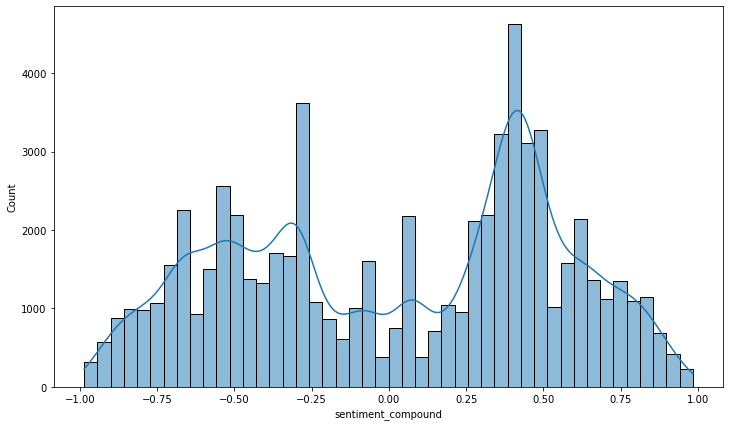

In [24]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.histplot(x=df.sentiment_compound, kde=True,ax=ax)

### Sentiment por temporada

x= df.groupby("Season").sentiment_compound.mean().sort_values(ascending= False).head(50).to_frame().reset_index()
ax= px.bar(x,x= "sentiment_compound",y= "Season",color= "sentiment_compound",template= "plotly_dark")
ax.show()

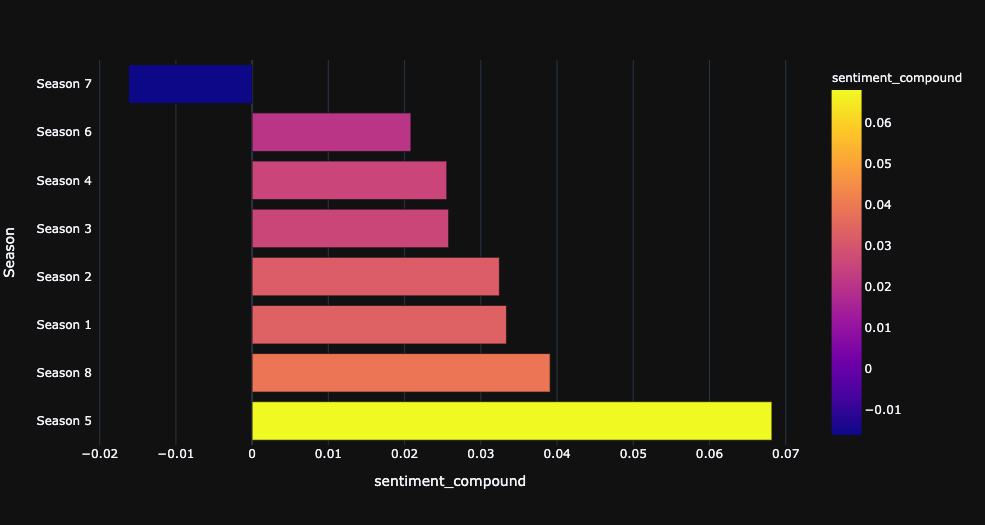

In [25]:
Image("images/season.png")

### Sentiment por personaje

x= df_names.groupby("Name").sentiment_compound.mean().sort_values(ascending= False).head(50).to_frame().reset_index()
ax= px.bar(x,x= "sentiment_compound",y= "Name",color= "sentiment_compound",template= "plotly_dark")
ax.show()

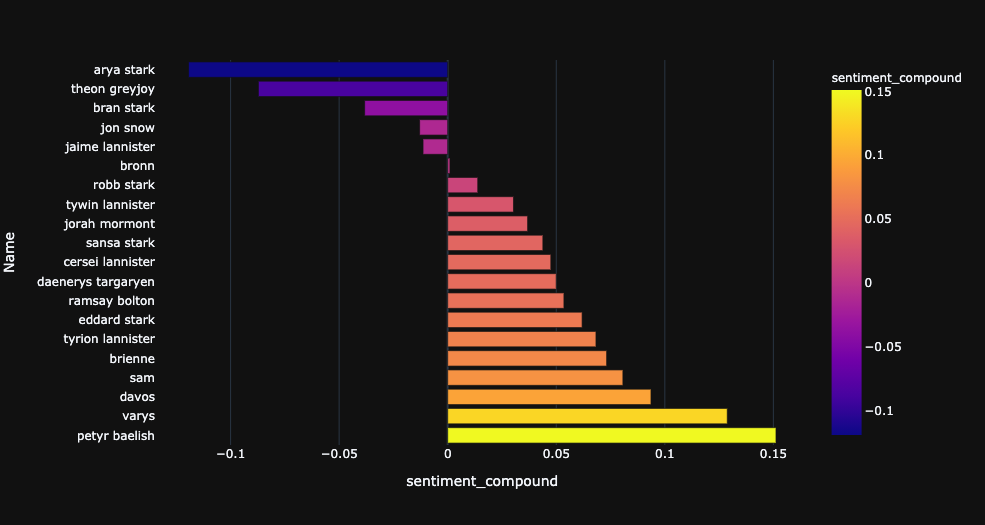

In [26]:
Image("images/personaje.png")